In [1]:
import json
import pandas as pd
import os
DATA_ROOT = "/data/joe/misinformation/FRESH/output/{}/bert_classification/fresh/wrapper_saliency/{}_thresholder/{}/human_supervision=0/model_b/"
dataset = ['pheme_drop_unverified'] #'pheme_all', 
thresholder = ['top_k', 'contiguous']
ratio = ['0.3', '0.5']

In [2]:
DATA = "/data/joe/misinformation/FRESH/output/{}/bert_classification/fresh/wrapper_saliency/{}_thresholder/{}/test.jsonl"
results = {}
for data in dataset:
    for th in thresholder:
        for ra in ratio:
            rationale = []
            file = DATA.format(data, th, ra)
            with open(file) as f:
                for line in f:
                    r = json.loads(line)
                    rationale.append(r['predicted_rationale']['document'])
            results.update({"-".join([data, th, ra]):rationale})
            print(len(rationale))
df = pd.DataFrame(results)

317
317
317
317


In [3]:
raw = pd.read_csv("/data/joe/misinformation/pheme_misinformation_drop_unverified.csv")

In [4]:
raw_test = raw[raw.exp_split=="test"]

In [5]:
df_all = pd.concat([raw_test.reset_index(), df], axis=1)

In [6]:
df_clean = df_all.drop(columns=["index", "Unnamed: 0"])

In [7]:
df_clean

,event,text,id,label,exp_split,pheme_drop_unverified-top_k-0.3,pheme_drop_unverified-top_k-0.5,pheme_drop_unverified-contiguous-0.3,pheme_drop_unverified-contiguous-0.5
0,gurlitt-all-rnr-threads,Swiss museum decides to accept Gurlitt Nazi-er...,536839580419231745,True,test,Swiss museum decides Gurlitt Nazi art museum h...,Swiss museum decides to accept Gurlitt Nazi ar...,Swiss museum decides to accept Gurlitt Nazi -,Swiss museum decides to accept Gurlitt Nazi - ...
1,gurlitt-all-rnr-threads,Swiss museum close to accepting #Gurlitt beque...,535721996391178242,True,test,Swiss museum close Gurlitt Nazi pieces,Swiss museum close to Gurlitt bequest Nazi loo...,Swiss museum close to accepting #,Swiss museum close to accepting # Gurlitt bequ...
2,gurlitt-all-rnr-threads,Gurlitt Collection Accepted by Kunstmuseum Ber...,536848662135980032,True,test,Gurlitt Collection Accepted Kunstmuseum Bern,Gurlitt Collection Accepted Kunstmuseum Bern t...,Gurlitt Collection Accepted by Kunstmuseum,Gurlitt Collection Accepted by Kunstmuseum Ber...
3,gurlitt-all-rnr-threads,Swiss museum to accept hundreds of works of ar...,536826824219959296,True,test,Swiss museum to accept hoarder http://t.co/n8t...,Swiss museum to accept of art bequeathed art h...,Swiss museum to accept hundreds of,Swiss museum to accept hundreds of works of ar...
4,gurlitt-all-rnr-threads,[NYTimes: Judaism] Swiss Museum Accepts Beque...,536845700835733504,True,test,Judaism Museum Accepts Bequest Nazi,Judaism Swiss Museum Accepts Bequest of Nazi h...,Museum Accepts Bequest of Nazi,Judaism ] Swiss Museum Accepts Bequest of Nazi
...,...,...,...,...,...,...,...,...,...
312,ferguson-all-rnr-threads,Shot ten times.\nUnarmed.\nWhat else is there ...,500421926079066112,False,test,Shot times Unarmed StopTheSmear # Ferguson,Shot ten times . Unarmed # StopTheSmear # Ferg...,about ? # StopTheSmear # Ferguson,there to talk about ? # StopTheSmear # Ferguson
313,ferguson-all-rnr-threads,Chief Jackson: officer Darren Wilson stopped #...,500360244187635712,True,test,: officer Darren stopped MikeBrown he Ferguson,Chief : officer Darren stopped MikeBrown initi...,: officer Darren Wilson stopped # MikeBrown,: officer Darren Wilson stopped # MikeBrown in...
314,ebola-essien-all-rnr-threads,Essien and his lawyers are considering to file...,522286703848218624,False,test,Essien his Nigerian the fake Ebola story,Essien and his are considering Nigerian the fa...,Nigerian media that reported the fake Ebola,against the Nigerian media that reported the f...
315,ebola-essien-all-rnr-threads,AC Milan midfielder Michael Essien has been di...,521360486387175424,False,test,AC Milan midfielder has diagnosed Ebola http:/...,AC Milan midfielder Essien has been diagnosed ...,Michael Essien has been diagnosed with Ebola,AC Milan midfielder Michael Essien has been di...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [23]:
df_event = df_clean[df_clean.event=="ottawashooting-all-rnr-threads"]
vectorizer = TfidfVectorizer(stop_words="english")
vectorizer.fit(df_event.text)
X = vectorizer.transform(df_event["pheme_drop_unverified-top_k-0.3"])
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

 

Top terms per cluster:
Cluster 0:
 rideau
 shooting
 ottawa
 shootings
 police
 centre
 war
 memorial
 cbcott
 suspects
Cluster 1:
 soldier
 shot
 ottawa
 dead
 died
 gunman
 war
 memorial
 national
 ottawashooting
Cluster 2:
 parliament
 shots
 gunman
 hill
 dies
 canadian
 ottawa
 josh_wingrove
 assailant
 hailed
Cluster 3:
 killed
 http
 identified
 soldier
 ottawashooting
 cirillo
 ottawa
 cpl
 suspect
 globeandmail
Cluster 4:
 http
 shooting
 canadian
 parliament
 suspects
 ottawa
 reservist
 gppg8dzpxq
 tyceeltjqc
 cirillo


/data/anaconda3/envs/joe/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


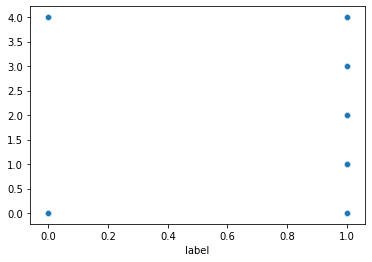

In [24]:
import seaborn as sns

prediction = model.predict(X)
labels = df_event.label.apply(lambda x: int(x))


sns.scatterplot(labels, prediction)

In [71]:
import numpy as np
a=np.equal(np.array(prediction),np.zeros(len(prediction)))

In [34]:
print(df_event[df_event.label==False].iloc[2].text)
print(df_event[df_event.label==False].iloc[2]['pheme_drop_unverified-top_k-0.3'])

BREAKING NEWS: Ottawa police confirm at least 3 separate shooting sites and multiple suspects -  http://t.co/lXFiYaVImZ
Ottawa police shooting sites suspects http://t.co/lXFiYaVImZ


In [35]:
print(df_event[df_event.label==True].iloc[2].text)
print(df_event[df_event.label==True].iloc[2]['pheme_drop_unverified-top_k-0.3'])

Updated: Full story on Nathan Cirillo, the soldier killed in #Ottawashooting http://t.co/znQSFJeNQf http://t.co/qM9gunIiJE
Cirillo soldier killed Ottawashooting http://t.co/qM9gunIiJE
